<a href="https://colab.research.google.com/github/LTPDat/AI/blob/main/W9_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

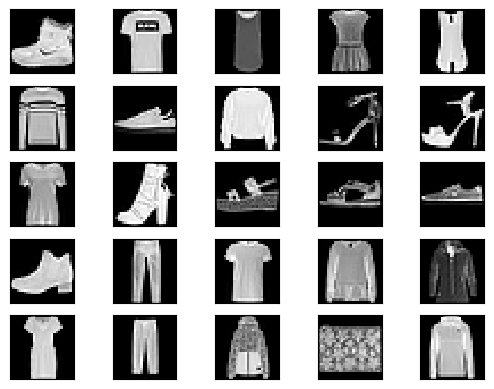

In [10]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_train = X_train.astype('float32')/255.0

In [14]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [20]:
batch_size = 64
epoch = 20
classes = 10

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (28,28,1), padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [28]:
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [32]:
train = model.fit(X_train, y_train, batch_size, epoch, verbose = 1)

Epoch 1/20
938/938 [==============================] - 120s 126ms/step - loss: 0.4318 - accuracy: 0.8432
Epoch 2/20
938/938 [==============================] - 115s 123ms/step - loss: 0.2653 - accuracy: 0.9031
Epoch 3/20
938/938 [==============================] - 115s 122ms/step - loss: 0.2216 - accuracy: 0.9178
Epoch 4/20
938/938 [==============================] - 115s 123ms/step - loss: 0.1924 - accuracy: 0.9293
Epoch 5/20
938/938 [==============================] - 115s 123ms/step - loss: 0.1704 - accuracy: 0.9367
Epoch 6/20
938/938 [==============================] - 115s 123ms/step - loss: 0.1467 - accuracy: 0.9452
Epoch 7/20
938/938 [==============================] - 115s 122ms/step - loss: 0.1252 - accuracy: 0.9534
Epoch 8/20
938/938 [==============================] - 115s 122ms/step - loss: 0.1074 - accuracy: 0.9593
Epoch 9/20
938/938 [==============================] - 114s 122ms/step - loss: 0.0894 - accuracy: 0.9674
Epoch 10/20
938/938 [==============================] - 115s 123m

In [34]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Weight/fashion_minist.h5')

In [35]:
X_test_std = X_test.astype('float32')/255.0

In [37]:
eval = model.evaluate(X_test_std, y_test, verbose = 0)
print("Test loss: ", eval[0])
print("Test accuracy: ", eval[1])

Test loss:  0.4801054298877716
Test accuracy:  0.9139000177383423


Text(0.5, 1.0, 'Training Accuracy and Loss')

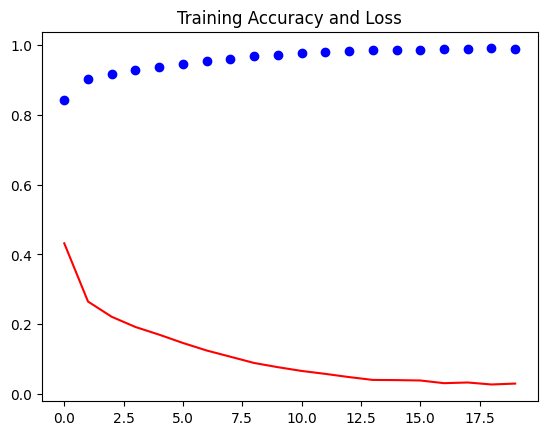

In [48]:
acc = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Train Accuracy')
plt.plot(epochs, loss, 'r', label = 'Loss')
plt.title("Training Accuracy and Loss")